## Instalación de geopandas y de pysal

In [94]:
! pip install geopandas
! pip install pysal

## Librerías

In [109]:
import pandas
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.svm import SVR
import cv2
import geopandas
from geopandas import GeoDataFrame
from pysal.lib import examples

In [110]:
df = pandas.read_csv('202201010000Lluv.csv', encoding = "ISO-8859-1")
df.head()

,LON,LAT,EDO,CLAVE,ESTACION,ene-22
0,-102.309722,21.895000,AGS,AGSAG,"Aguascalientes, Ags.",1.50
1,-102.585833,22.177222,AGS,ALMAG,"Alamitos, Ags.",5.50
2,-102.184167,21.738611,AGS,BRTAG,"San Bartolo, Ags.",0.00
3,-102.712222,21.849167,AGS,CALVILLO,"Calvillo, Ags. SMN*",1.75
4,-102.676944,21.997500,AGS,CDRAG,"La Codorniz, Ags.",0.00


## Xtrain y Ytrain

In [111]:
Xtrain = df[['LON','LAT']].values
Ytrain = df.values[:,-1]
print('Xtrain', Xtrain.shape, 'Ytrain', len(Ytrain))

Xtrain (1252, 2) Ytrain 1252


## Modelo SVR

In [112]:
model = SVR()
model.fit(Xtrain, Ytrain)

SVR()

## Creación del mapa de lluvia (prueba)

In [113]:
minx,miny = np.min(Xtrain,axis=0)
maxx,maxy = np.max(Xtrain,axis=0)

N = 100
rowx = np.linspace(minx, maxx, N)
rowy = np.linspace(miny, maxy, N)
xx, yy = np.meshgrid(rowx, rowy)
zz = np.zeros((N, N), float)
color = np.zeros((N,N,4))

norm = matplotlib.colors.Normalize(vmin=0, vmax=40)
for x in range(N):
    for y in range(N):
        vec = np.array([[ xx[x, y], yy[x, y] ]])
        zz[x,y] = model.predict(vec)
        c = list(matplotlib.cm.jet(norm(zz[x, y])))
        color[N-1 - x, y, :] = c
color = (color * 255).astype(int)

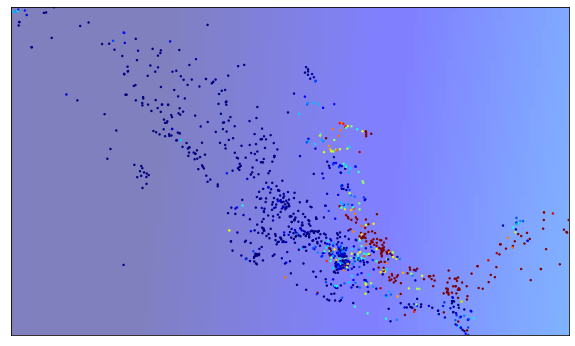

In [114]:
plt.figure(figsize=(10,10))
plt.scatter(df['LON'].values,df['LAT'].values,s=2,c=df.values[:,-1],vmin=0,vmax=40,cmap='jet')
plt.imshow(color,extent=(minx,maxx,miny,maxy),alpha=0.5)
plt.xticks([])
plt.yticks([])
plt.xlim([minx, maxx])
plt.ylim([miny, maxy])
plt.show()

## Landmarks

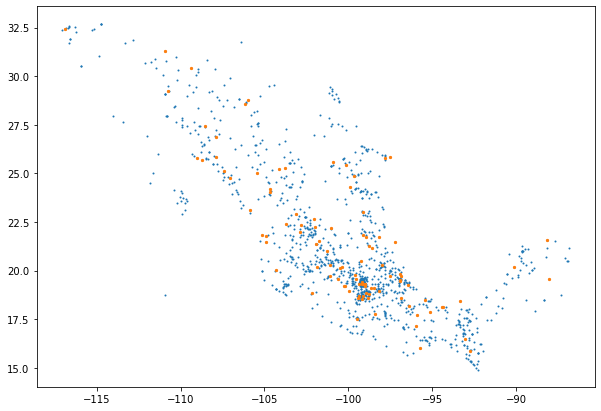

In [115]:
nL = 100
n = len(Xtrain)

idx = np.random.permutation(n)[:nL]
XL = Xtrain[idx,:]

plt.figure(figsize=(10,7))
plt.scatter(Xtrain[:,0], Xtrain[:,1], s=1)
plt.scatter(XL[:,0], XL[:,1], s=5)
plt.show()

In [116]:
XLtrain = np.zeros((n,nL))

for i in range(n):
    for j in range(nL):
        XLtrain[i,j] = np.linalg.norm(( Xtrain[i,:]-XL[j,:] ))
        
print('Xtrain', Xtrain.shape)
print('XLtrain', XLtrain.shape)

Xtrain (1252, 2)
XLtrain (1252, 100)


## Modelo SVR

In [117]:
model = SVR(kernel="linear")
model.fit(XLtrain, Ytrain)

SVR(kernel='linear')

## Creación del mapa de lluvia

In [118]:
minx,miny = np.min(Xtrain,axis=0)
maxx,maxy = np.max(Xtrain,axis=0)

N = 100
rowx = np.linspace(minx, maxx, N)
rowy = np.linspace(miny, maxy, N)
xx, yy = np.meshgrid(rowx, rowy)
zz = np.zeros((N, N), float)
color = np.zeros((N,N,4))

norm = matplotlib.colors.Normalize(vmin=0, vmax=40)
for x in range(N):
    for y in range(N):
        vec = np.array([[ xx[x, y], yy[x, y] ]])
        
        vecL = np.zeros((1,nL))
        for j in range(nL):
            vecL[0,j] = np.linalg.norm(( vec-XL[j,:] ))
        zz[x,y] = model.predict(vecL)
        
        c = list(matplotlib.cm.jet(norm(zz[x, y])))
        color[N-1 - x, y, :] = c
color = (color * 255).astype(int)

## Guardado del mapa

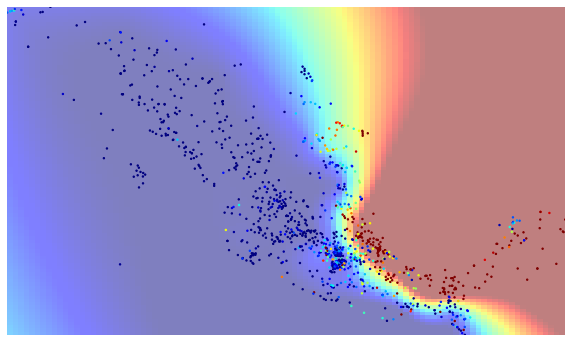

In [119]:
plt.figure(figsize=(10,10))
plt.axis('off')
plt.scatter(df['LON'].values,df['LAT'].values,s=2,c=df.values[:,-1],vmin=0,vmax=40,cmap='jet')
plt.imshow(color,extent=(minx,maxx,miny,maxy),alpha=0.5)

plt.savefig("mexicoColores.png")

## Geopandas

In [121]:
mexicoDF = geopandas.read_file(examples.get_path("mexicojoin.shp"))
mexicoDF

,POLY_ID,AREA,CODE,NAME,PERIMETER,ACRES,HECTARES,PCGDP1940,PCGDP1950,PCGDP1960,...,GR9000,LPCGDP40,LPCGDP50,LPCGDP60,LPCGDP70,LPCGDP80,LPCGDP90,LPCGDP00,TEST,geometry
0,1,7.252751e+10,MX02,Baja California Norte,2040312.385,1.792187e+07,7.252751e+06,22361.0,20977.0,17865.0,...,0.05,4.35,4.32,4.25,4.40,4.47,4.43,4.48,1.0,"MULTIPOLYGON (((-113.13972 29.01778, -113.2405..."
1,2,7.225988e+10,MX03,Baja California Sur,2912880.772,1.785573e+07,7.225988e+06,9573.0,16013.0,16707.0,...,0.00,3.98,4.20,4.22,4.39,4.46,4.41,4.42,2.0,"MULTIPOLYGON (((-111.20612 25.80278, -111.2302..."
2,3,2.731957e+10,MX18,Nayarit,1034770.341,6.750785e+06,2.731957e+06,4836.0,7515.0,7621.0,...,-0.05,3.68,3.88,3.88,4.04,4.13,4.11,4.06,3.0,"MULTIPOLYGON (((-106.62108 21.56531, -106.6475..."
3,4,7.961008e+10,MX14,Jalisco,2324727.436,1.967200e+07,7.961008e+06,5309.0,8232.0,9953.0,...,0.03,3.73,3.92,4.00,4.21,4.32,4.30,4.33,4.0,"POLYGON ((-101.52490 21.85664, -101.58830 21.7..."
4,5,5.467030e+09,MX01,Aguascalientes,313895.530,1.350927e+06,5.467030e+05,10384.0,6234.0,8714.0,...,0.13,4.02,3.79,3.94,4.21,4.32,4.32,4.44,5.0,"POLYGON ((-101.84620 22.01176, -101.96530 21.8..."
5,6,3.034491e+10,MX11,Guanajuato,918758.241,7.498360e+06,3.034491e+06,4359.0,5686.0,8209.0,...,0.06,3.64,3.75,3.91,4.07,4.14,4.13,4.19,6.0,"POLYGON ((-100.28030 20.20451, -100.34860 20.0..."
6,7,1.203240e+10,MX22,Queretaro de Arteaga,619581.709,2.973259e+06,1.203240e+06,11016.0,5560.0,7110.0,...,0.07,4.04,3.75,3.85,4.15,4.30,4.35,4.42,7.0,"POLYGON ((-100.12280 19.93804, -100.18250 20.0..."
7,8,2.123533e+10,MX13,Hidalgo,953861.244,5.247343e+06,2.123533e+06,4414.0,5194.0,6399.0,...,-0.03,3.64,3.72,3.81,3.89,4.09,4.12,4.09,8.0,"POLYGON ((-98.65941 19.58540, -98.65556 19.595..."
8,9,5.947352e+10,MX16,Michoacan de Ocampo,1431015.877,1.469617e+07,5.947352e+06,3327.0,5272.0,5244.0,...,0.03,3.52,3.72,3.72,3.91,4.05,4.04,4.07,9.0,"POLYGON ((-103.47960 18.96722, -103.34830 18.9..."
9,10,2.147628e+10,MX15,Mexico,888381.807,5.306884e+06,2.147628e+06,3408.0,4972.0,9053.0,...,-0.06,3.53,3.70,3.96,4.23,4.30,4.27,4.21,10.0,"POLYGON ((-98.62798 19.47576, -98.66612 19.405..."


## Guardado del mapa de México

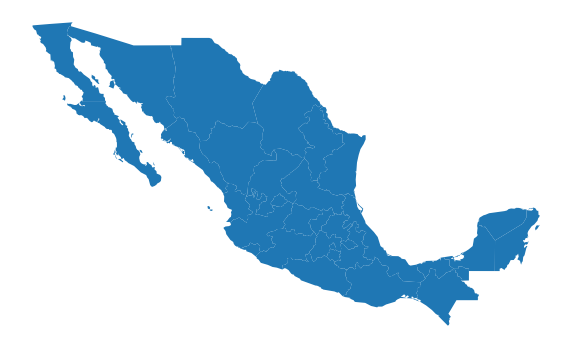

In [122]:
mexicoPlot = mexicoDF.plot(figsize=(10,10))
mexicoPlot.axis('off')
plt.savefig("mexicoFigura.png")

## Creación de máscara

<Figure size 720x720 with 0 Axes>

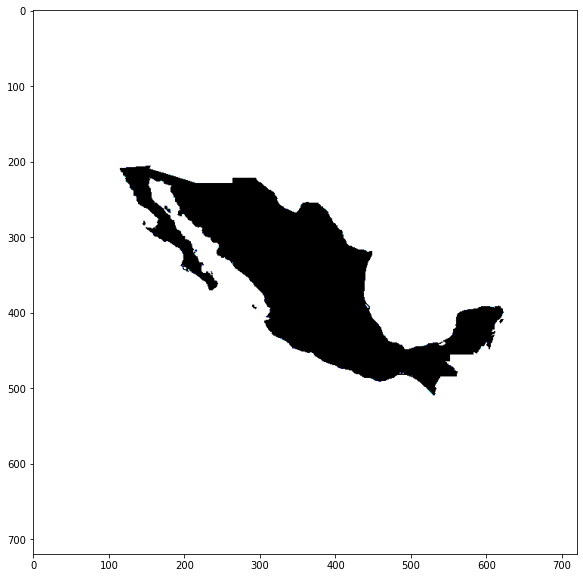

[False False False]


In [123]:
plt.figure(figsize=(10,10))
img1 = cv2.imread("mexicoFigura.png", cv2.IMREAD_COLOR)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img1 = np.where(img1 > 250, 255,0)
mask = np.array(img1, dtype=bool)

plt.figure(figsize=(10,10))
plt.imshow(img1)
plt.show()

print(mask[400,400])

## Lectura del mapa de lluvia

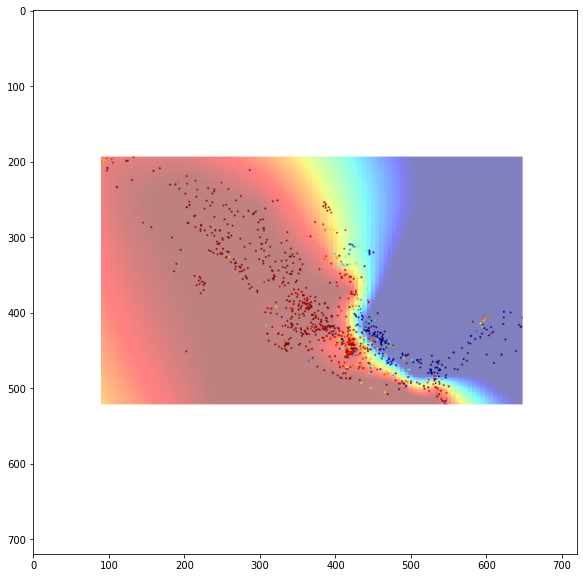

In [124]:
img2 = cv2.imread("mexicoColores.png", cv2.IMREAD_COLOR)

plt.figure(figsize=(10,10))
plt.imshow(img2)
plt.show()

## Superposición de mapas

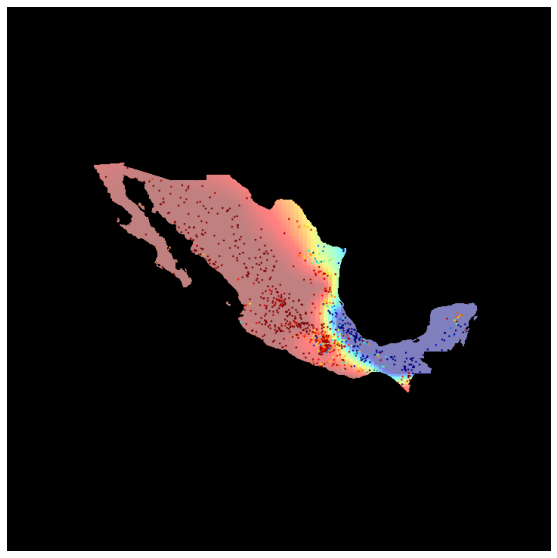

In [125]:
img2[mask]=0

plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(img2)